In [1]:
#Python Data Visualization Cookbook P.53

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def is_outlier(points, threshold=3.5):
    """
    Returns a boolean array with True if [points] are outliers and False otherwise.
    Data points with a modified z-score greater than this
    # value will be classified as outliers.
    """
# transform into vector
    if len(points.shape) == 1:
        points = points[:,None]
    # compute median value
    median = np.median(points, axis=0)
    # compute diff sums along the axis
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    # compute MAD
    med_abs_deviation = np.median(diff)
    # compute modified Z-score
    # http://www.itl.nist.gov/div898/handbook/eda/section4/eda43.htm#Iglewicz
    modified_z_score = 0.6745 * diff / med_abs_deviation
    # return a mask for each outlier
    return modified_z_score > threshold
    # Random data
x = np.random.random(100)
# histogram buckets
buckets = 50
# Add in a few outliers
x = np.r_[x, -49, 95, 100, -100]
# Keep valid data points
# Note here that
# "~" is logical NOT on boolean numpy arrays
filtered = x[~is_outlier(x)]

In [22]:
x = [1,2,3,2,3,4,199,-122]

In [24]:
x_med = np.median(x)

In [39]:
diff = np.sqrt((x - x_med)**2)
med_abs_deviation = np.median(diff)

In [40]:
z_score = 0.6745 * diff/med_abs_deviation

In [ ]:
z_score

In [10]:
list(zip(x[0:3],is_outlier(x)[0:3]))

[(0.89884259381040899, False),
 (0.19279121023141055, False),
 (0.43142795048906002, False)]

In [14]:
import pandas as pd

In [17]:
df = pd.DataFrame(list(zip(is_outlier(x), x)), columns=['outlier', 'data'])

In [21]:
df[df.outlier == False].head()

,outlier,data
0,False,0.898843
1,False,0.192791
2,False,0.431428
3,False,0.680911
4,False,0.035144


In [13]:
x_filtered = [d for o, d in zip(is_outlier(x), x) if o == False]

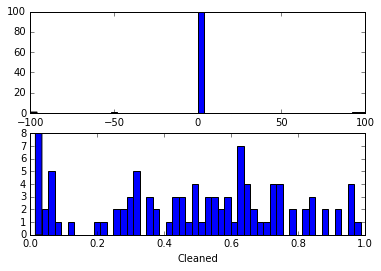

In [4]:
# plot histograms
plt.figure()
plt.subplot(211)
plt.hist(x, buckets)
plt.xlabel('Raw')
plt.subplot(212)
plt.hist(filtered, buckets)
plt.xlabel('Cleaned')
plt.show()